<a href="https://www.kaggle.com/code/sophieb/a-journey-through-text-data-competitions?scriptVersionId=159086715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2023-kaggle-ai-report/sample_submission.csv
/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json
/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv
/kaggle/input/top-3-kaggle-text-data-competitions-2021-2023/Summary_27write-ups_AIreport - Text Data Write-ups 27.csv
/kaggle/input/top-3-kaggle-text-data-competitions-2021-2023/Summary_27write-ups.csv
/kaggle/input/top-3-kaggle-text-data-competitions-2021-2023/Summary_27write-ups_AIreport .csv
/kaggle/input/faq-kaggle-text-data-competitions-2021-2023/Summary_27write-ups_AIreport - FAQ.csv


<h1><center>A Journey Through Kaggle Text Data Competitions From 2021 to 2023</center></h1>
<center>Authors: <a href="https://www.kaggle.com/sophieb">Liliana Badillo</a> and <a href="https://www.kaggle.com/sblaizer">Salomon Marquez</a></center>

<center><i>“It is estimated that 90% of the world’s data was generated in the last two years alone”</i> by <a href="https://explodingtopics.com/blog/data-generated-per-day">Amount of Data Created Daily (2023)</a>
</center>

<br>

**Natural Language Processing (NLP)**, the branch of artificial intelligence that enables computers to understand human language, has witnessed remarkable growth and transformative advancements in recent years. This surge has been driven by the increasing availability of vast amounts of text data and the rapid development of sophisticated machine learning techniques.

[**Kaggle**](https://www.kaggle.com/) is an online platform that hosts machine learning and data science competitions. Among these competitions, text data competitions specifically focus on tasks related to NLP and text analysis. Participants are provided with text datasets and are tasked with developing models and algorithms to solve language-related challenges such as sentiment analysis, text classification, and machine translation. These competitions are instrumental in advancing NLP techniques and provide participants with valuable experience and knowledge exchange opportunities.

Accessing and learning about the latest techniques employed in text data Kaggle competitions can be challenging due to their dispersion within discussions and winning solution write-ups. **Valuable information about these cutting-edge approaches tends to get buried, making it difficult to stay updated on the evolving landscape of text data techniques.**

In this essay, our objective is to offer valuable insights into key lessons learned by the Kaggle community during their engagement in text data competitions spanning from 2021 to 2023. We will focus on **four pivotal topics** that have emerged as the foundation for successful solutions in recent years: **model architectures**, **pseudo labeling**, **adversarial weight perturbation**, and **mask language modeling**. By examining these four key areas, we aim to provide a comprehensive understanding of the essential elements driving winning strategies in text data competitions.


---

# Methodology

To gain a better understanding into the text data landscape, we carried out the following tasks:  

* **Analize 27 write-ups from nine Kaggle competitions specifically related to text data**. We dove deeper into the top three solutions for text data competitions held from 2021 to 2023, see **Figure 1**. Also, we explore a range of topics, including the prevalent techniques and methodologies employed, the most effective model architectures utilized, and the challenges encountered and overcame. This analysis enabled us to gain deeper insights into the problem-solving approaches and thought processes employed by Kagglers in developing their successful solutions.

* **Perform a general but not exhaustive analysis to the [arXiv dataset](https://www.kaggle.com/datasets/Cornell-University/arxiv)**. We filter out categories with the potential to include NLP papers published within the past two years. By leveraging a predefined list of keywords associated with text data, we directed our efforts towards uncovering the specific problem domains and top leading model architectures [1][2] that have garnered attention within the research community. 


In [67]:
import matplotlib.dates as mdates
from datetime import datetime

names = ['U.S. Patent Phrase to Phrase Matching',
         'Google AI4Code – Understand Code in Python Notebooks', 
         'Feedback Prize — Predicting Effective Arguments', 
         'NBME — Score Clinical Patient Notes', 
         'Feedback Prize — Evaluating Student Writing', 
         'Jigsaw Rate Severity of Toxic Comments',
         'chaii — Hindi and Tamil Question Answering', 
         'CommonLit Readability Prize', 
         'Coleridge Initiative — Show US the Data']

dates = ['2022-03-21', 
         '2022-05-11', 
         '2022-05-24', 
         '2022-02-01',
         '2021-12-14', 
         '2021-11-08', 
         '2021-08-11', 
         '2021-05-03',
         '2021-03-23']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

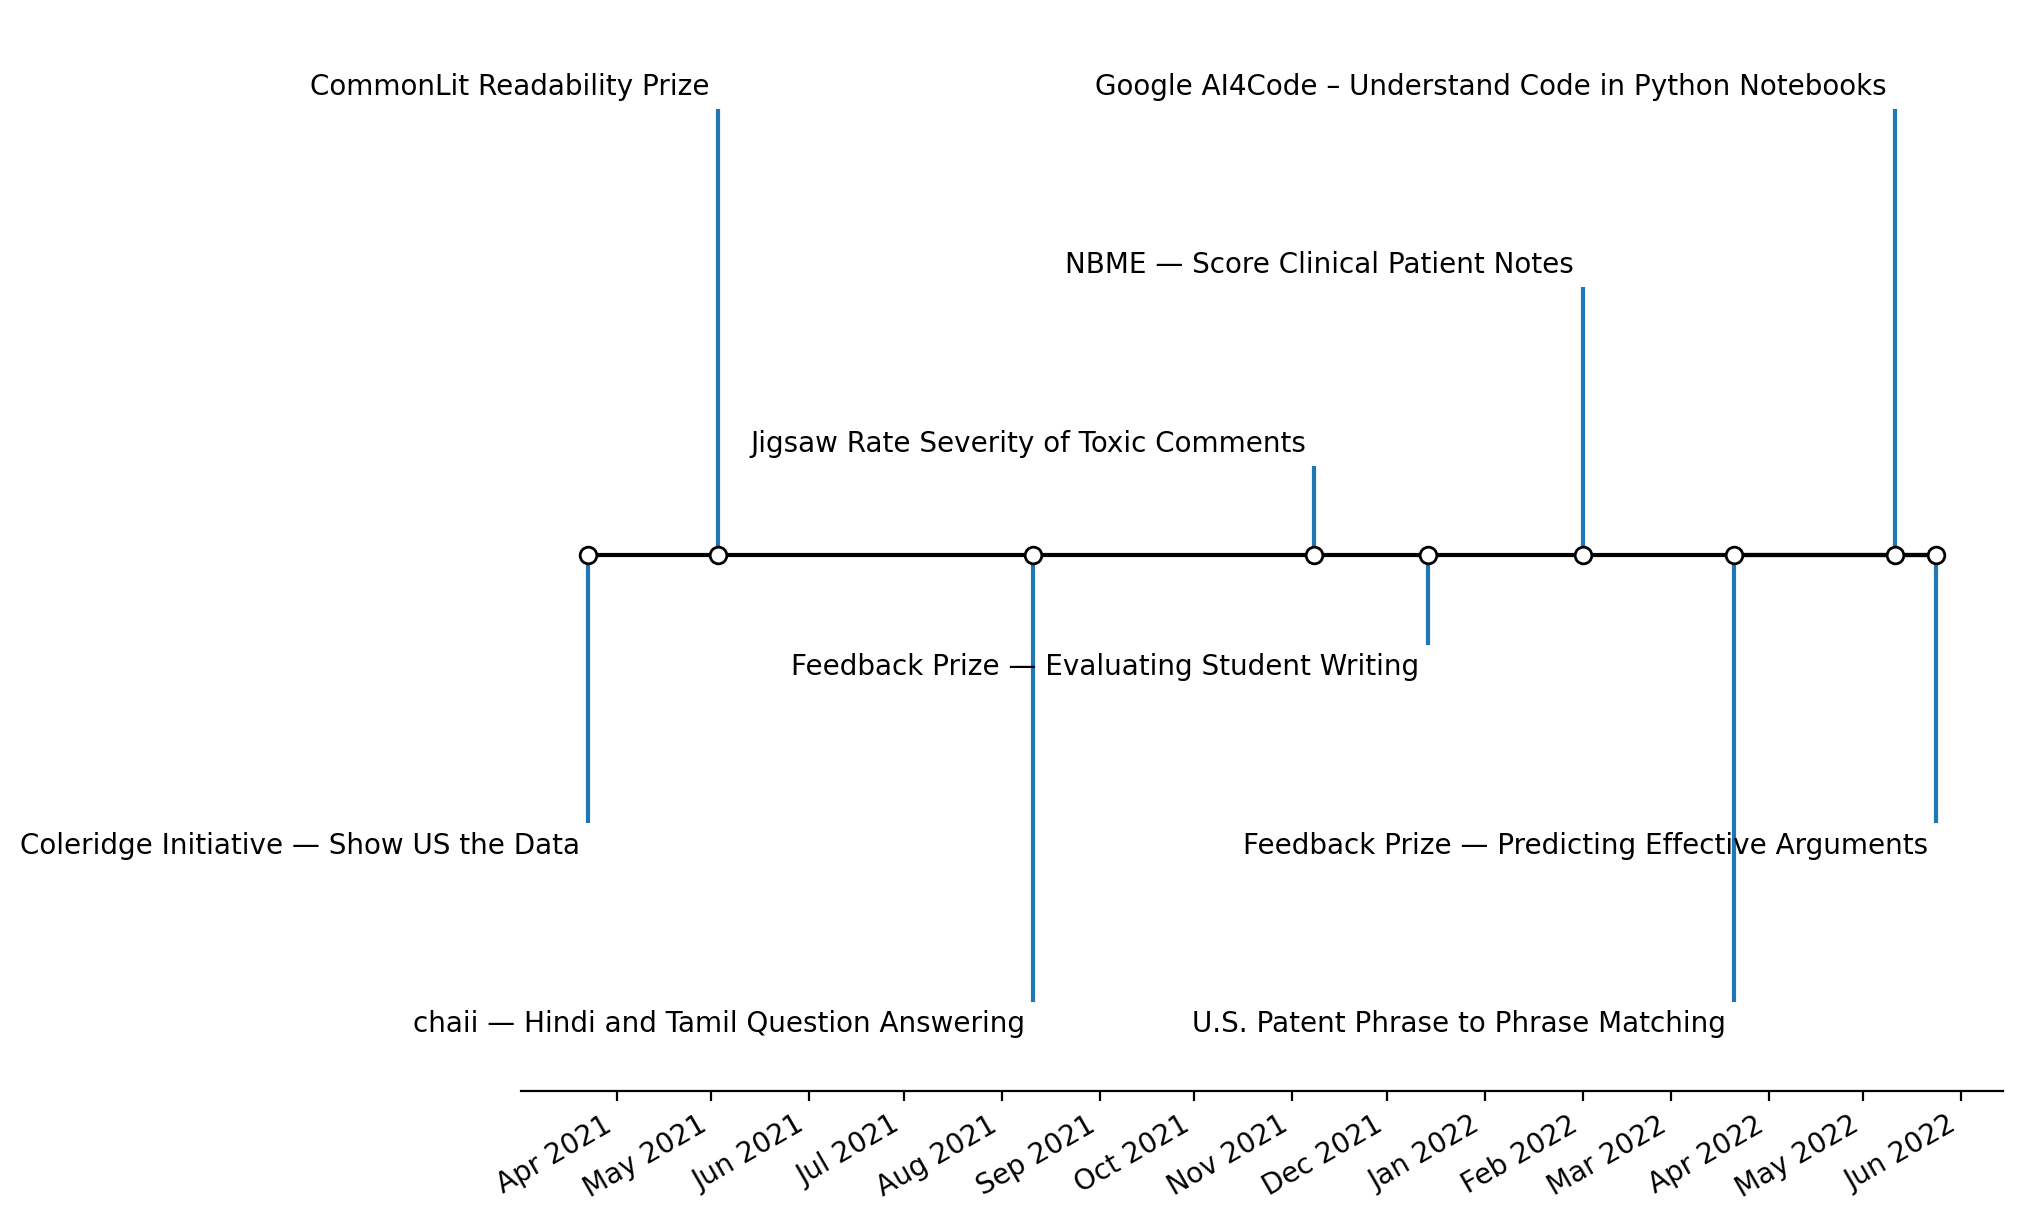

In [68]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
#ax.set(title="Kaggle text data competitions from 2021 to 2023")

ax.vlines(dates, 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 2-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
%config InlineBackend.figure_format = 'retina'
plt.show()

<center><b>Figure 1.</b> Kaggle text data competitions held from 2021 to 2023</center>

# Key Discoveries of Text Data Competitions

The result of the analysis of the 27 write-ups and their most notable comments can be seen in [Table I of Appendix A](#Appendix-A) and [Table II of Appendix B](#Appendix-B), respectively. **Table I** provides information about the top three winning solutions in each Kaggle competition related to text, highlighting aspects such as model architectures, parameters like PB and LB, optimizers, ensembles, and the most innovative proposed ideas, among others. On the other hand, **Table II** presents a summary of comments from the write-ups in a question-like format. Additionally, the analysis of the arXiv dataset has allowed us to unveil, on a larger scale, how the use of certain model architectures and their application to specific text domains compares to the solutions presented in text-oriented Kaggle competitions over the past two years. For more details, please refer to [EDA Kaggle and Arxiv datasets](https://www.kaggle.com/code/sophieb/eda-kaggle-and-arxiv-datasets) notebook.

As **Figure 2** shows, out of the nine competitions, five focused on text classification tasks, two aimed at information extraction tasks, and the remaining targeted text matching and question-and-answer tasks. Interestingly, **Figure 3** shows that with a frequency of the term "question answering" exceeding 400 times, it can be inferred that the scientific community has placed greater importance on domains related to this field. While Kaggle competitions have only hosted one question-and-answer competition, there seems to be a stronger relationship between Kaggle competitions and research topics related to text classification (over 200 ocurrences in arVix dataset). Especifically, text generation has become a highly prominent topic within the research community over the past two years. Meanwhile, tasks like sentiment analysis, text classification, information retrieval, and text summarization continue to be trending topics.

In [69]:
import re

def clean_text(df, col_to_clean):

    # Remove html tags
    df['cleaned_text'] = df[col_to_clean].apply(lambda x: re.sub('<[^<]+?>', '', x))

    # Remove special characters
    df['cleaned_text'] = df['cleaned_text'].str.replace("\n+", "", regex=True).str.replace("-", " ", regex=False).str.replace("[^a-zA-Z0-9 ]", "", regex=True)

    # Lowercase text
    df['cleaned_text'] = df['cleaned_text'].str.lower()
    
    return df

def count_occurrences_in_dataframe(df, column_name, strings_list):
    # Convert the list of strings to a set for faster membership checking
    strings_set = set(strings_list)
    
    # Filter the dataframe to include only rows where the text column contains any of the strings
    filtered_df = df[df[column_name].str.contains('|'.join(strings_set))]
    
    # Use value_counts() to count the occurrences of each string
    counts = filtered_df[column_name].value_counts()
    
    # Create a dictionary to store the results
    results_dict = {'String': [], 'Occurrences': [], 'Actual Occurrences': []}
    
    # Iterate over the strings list
    for string in strings_list:
        # Add the string and its corresponding count to the dictionary
        results_dict['String'].append(string)
        results_dict['Occurrences'].append(counts.get(string, 0))
        
        # Count the actual occurrences in the filtered dataframe
        actual_occurrences = filtered_df[column_name].str.count(string).sum()
        results_dict['Actual Occurrences'].append(actual_occurrences)
    
    # Convert the dictionary to a dataframe
    counts_df = pd.DataFrame(results_dict)
    
    return counts_df

df_arxiv = pd.read_json("/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json", 
                     lines=True,
                     convert_dates=True,
                     chunksize=100000,
                    )

nlp_related_categories_arxiv = [
    "cs.IR", "cs.CL", "cs.LG", "cs.NE",
    "cs.AI", "cs.DL", "cs.HC", "cs.SI",
    "cs.SD", "cs.WEB", "stat.ML", "math.IT"
]

nlp_related_categories = pd.DataFrame()

for chunk in df_arxiv:
    chunk_nlp_papers = chunk[chunk.categories.isin(nlp_related_categories_arxiv)]
    nlp_related_categories = pd.concat([nlp_related_categories, chunk_nlp_papers], ignore_index=True)
      
nlp_related_categories['update_date']= pd.to_datetime(nlp_related_categories['update_date'])

nlp_related_categories = nlp_related_categories[(nlp_related_categories['update_date'].dt.year > 2020) & (nlp_related_categories['update_date'].dt.month > 4)].copy()

nlp_related_categories = nlp_related_categories.reset_index(drop=True)

text_data_keywords = [
     "text mining",
     "text analytics",
     "text preprocessing",
     "text classification",
     "text clustering",
     "text matching",
     "sentiment analysis",
     "named entity recognition",
     "topic modeling",
     "information retrieval",
     "text summarization",
     "text generation",
     "text similarity",
     "word embeddings",
     "document classification",
     "text feature extraction",
     "text segmentation",
     "text corpora",
     "textual data analysis",
     "question answering",
     "sentiment analysis",
     "language modeling"
]

nlp_related_categories = clean_text(nlp_related_categories, 'abstract')

result = count_occurrences_in_dataframe(nlp_related_categories, 'cleaned_text', text_data_keywords)

sorted_result = result.sort_values('Actual Occurrences', ascending=True)

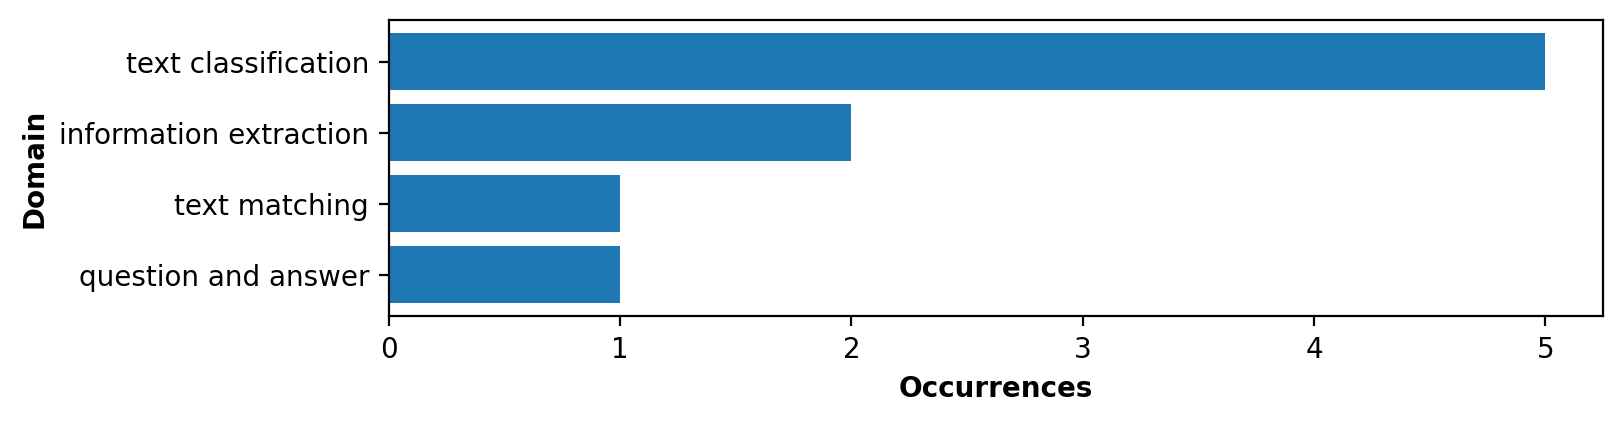

In [71]:
%config InlineBackend.figure_format = 'retina'

labels = ['text classification', 'information extraction', 'question and answer', 'text matching']
sizes = [5, 2, 1, 1]

# Sort the labels and sizes in reverse order
labels_sorted, sizes_sorted = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=False))

fig, ax = plt.subplots(figsize=(8, 2),layout="constrained")
ax.barh(labels_sorted, sizes_sorted)
ax.set_xlabel('Occurrences',fontweight='bold');
ax.set_ylabel('Domain', fontweight='bold');
#ax.set_title('a) Domains in Kaggle text data competitions');


<center><b>Figure 2.</b> Main text related domains found in Kaggle text data competitions from 2021 to 2023</center>

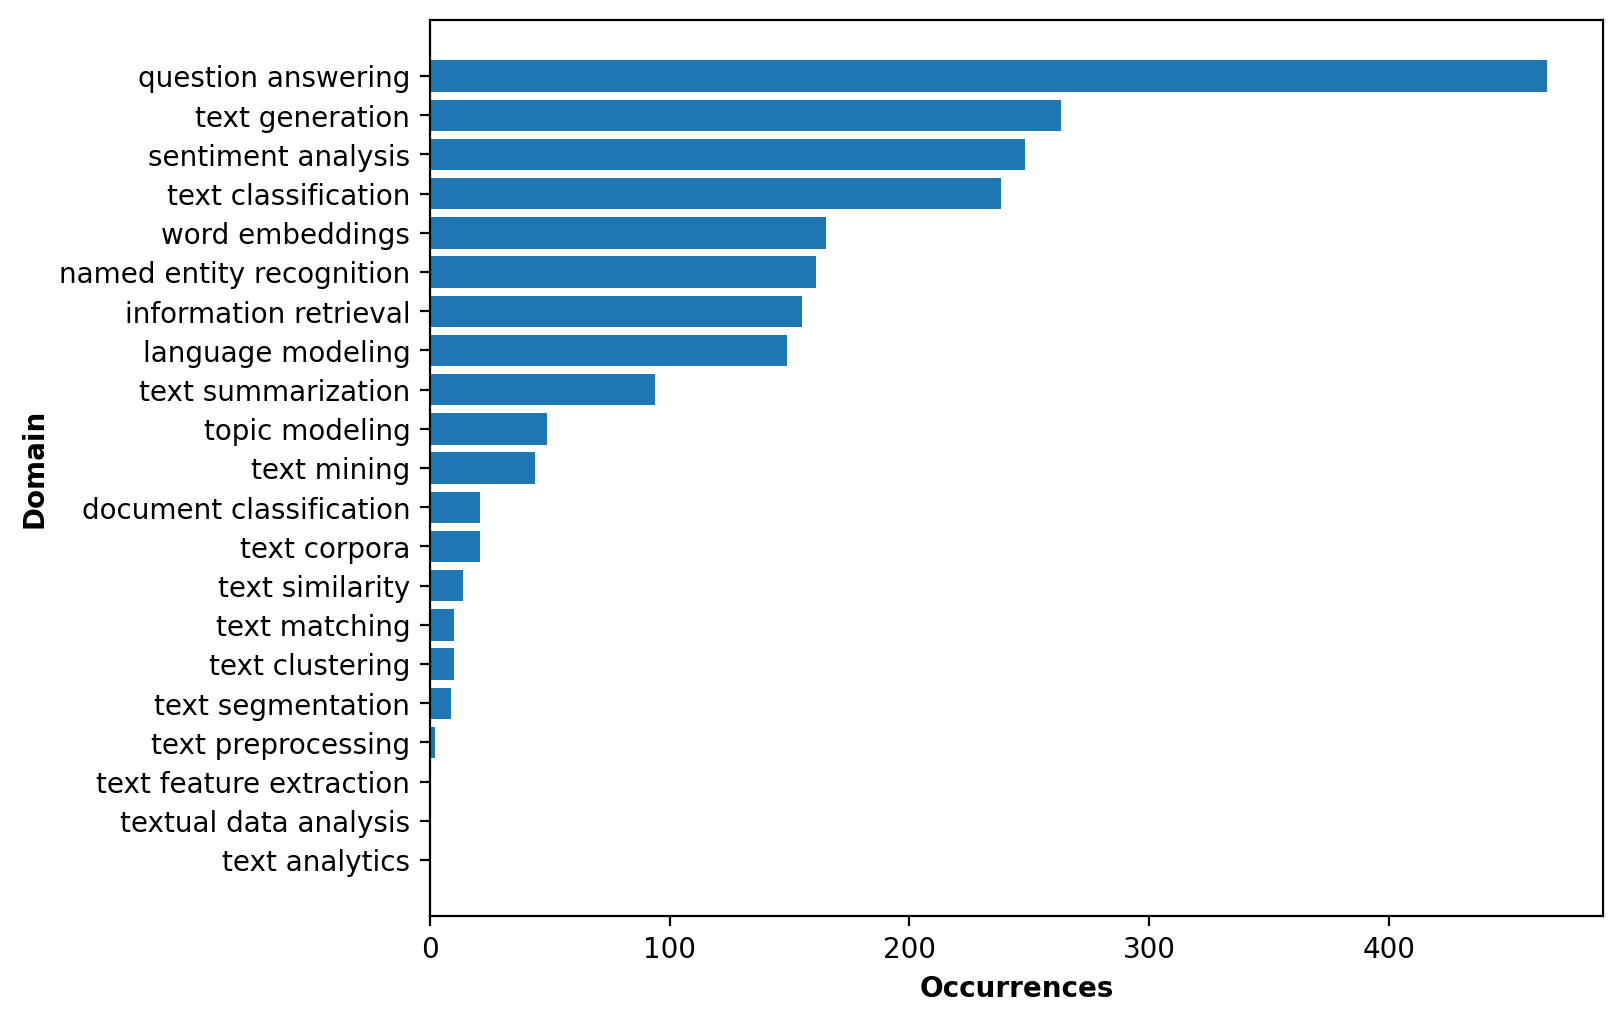

In [73]:
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8, 5),layout="constrained")

ax.barh(sorted_result["String"], sorted_result['Actual Occurrences'])
ax.set_xlabel('Occurrences',fontweight='bold');
ax.set_ylabel('Domain', fontweight='bold');
#ax.set_title('Text data keywords mentioned in Arxiv papers');

<center><b>Figure 3.</b> Main text related domains found in Arxiv papers from 2021 to 2023</center>

In the four following sections, we focus our discussion on these topics:

* Model Architecture
* Adversarial Weight Perturbation (AWP)
* Pseudo Labeling
* Masked Language Modeling (MLM)

Our motivation for discussing these four topics is based on two aspects. Firstly, we believe that they were the most impactful strategies used to improve the accuracy of the proposed models among the winning solutions. We identified that the ML community showed great interest in these strategies, as evidenced by the numerous questions found in the comments section of the write-ups regarding their implementation. Secondly, we identified that Kagglers relied on various scientific articles related to these four strategies, which we believe could be of interest to the ML community for a better understanding and implementation of these strategies while developing their solutions.

---

# Model Architecture

Despite the proliferation of GPT models, it is evident that the ML community has opted to rely on the performance of BERT-based models. As **Figure 3** shows, the top three Kaggle text data solutions from 2021 to 2023 predominantly utilize five architectures: **deberta-v3-large**, **deberta-large**, **roberta-base**, **roberta-large**, and **deberta-v2-xlarge**. Out of the 27 analyzed solutions, only one approach [3] from the Coleridge Initiative — Show US the Data competition employed causal Language Models (CLM) like **GPT-2** to ensure that their model comprehends the context rather than just the target text. The underlying motivation behind this decision is that contextual models such as **BERT** can sometimes disregard the context itself in their quest to locate and match the exact target words, which can lead to overfitting. Similarly, **Figure 4** indicates that the term *BERT* has gained significant attention within the scientific community, with over 1,750 mentions in arXiv papers, surpassing the over 300 mentions of the term *GPT*.


In [74]:
kw_text_data_architectures = [
    "fasttext", "roberta", "bert",
    "gpt", "rnn", "cnn", "gru",
    "t5", "electra", "xlnet",
    "lstm", "deberta", "codebert"
]

top_text_data_architectures = [
    "bert", "gpt", "xlnet",
    "roberta", "albert", "t5",
    "electra", "deberta", "palm",
    "structbert"
]

arxiv_text_data_architectures = list(set(top_text_data_architectures).union(set(kw_text_data_architectures)))

result = count_occurrences_in_dataframe(nlp_related_categories, 'cleaned_text', arxiv_text_data_architectures)
sorted_result = result.sort_values('Actual Occurrences', ascending=True)

In [75]:
model_arch = [
    'deberta-v3-large', 'deberta-large', 'roberta-base', 'roberta-large',
    'deberta-v2-xlarge', 'deberta-xlarge', 'muril-large-cased', 'anferico/bert-for-patents',
    'albert-xxlarge-v2', 'bert-base-uncased', 'rembert', 'funnel-transformer/large-base',
    'longformer', 'funnel-transformer/large', 'longformer-large-4096', 'deberta-v2-xxlarge',
    'electra-large-discriminator', 't5-large', 'xlm-roberta-large-squad2',
    'AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru', 'microsoft/infoxlm-large',
    'gpt2', 'electra-base-discriminator', 'muppet-roberta-large', 'xlm-roberta-large',
    'sshleifer/distilbart-cnn-12-6', 'microsoft/mpnet-base', 'gpt2-medium', 'bart-large',
    'bigbird-roberta-base', 'xlm-roberta-base', 'distilroberta-base', 'Yanhao/simcse-bert-for-patent',
    'electra-large', 'deberta-v1', 'deberta-v1-xlarge', 'codebert-base',
    'sentence-transformers/paraphrase-multilingual-mpnet-base-v2', 'luke', 'deberta-base',
    'deberta-v2-large', 'distilbart-mnli-12-9', 'bart-large-finetuned-squadv1',
    'ccdv-ai/convert_checkpoint_to_lsg', 'ahotrod/electra_large_discriminator_squad2_512',
    'uw-madison/yoso-4096'
]

occurrences = [
    12, 11, 7, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]

data = {
    'Model architecture': model_arch,
    'Occurrence': occurrences
}

arch_df = pd.DataFrame(data)
sorted_df = arch_df.sort_values('Occurrence', ascending=True)

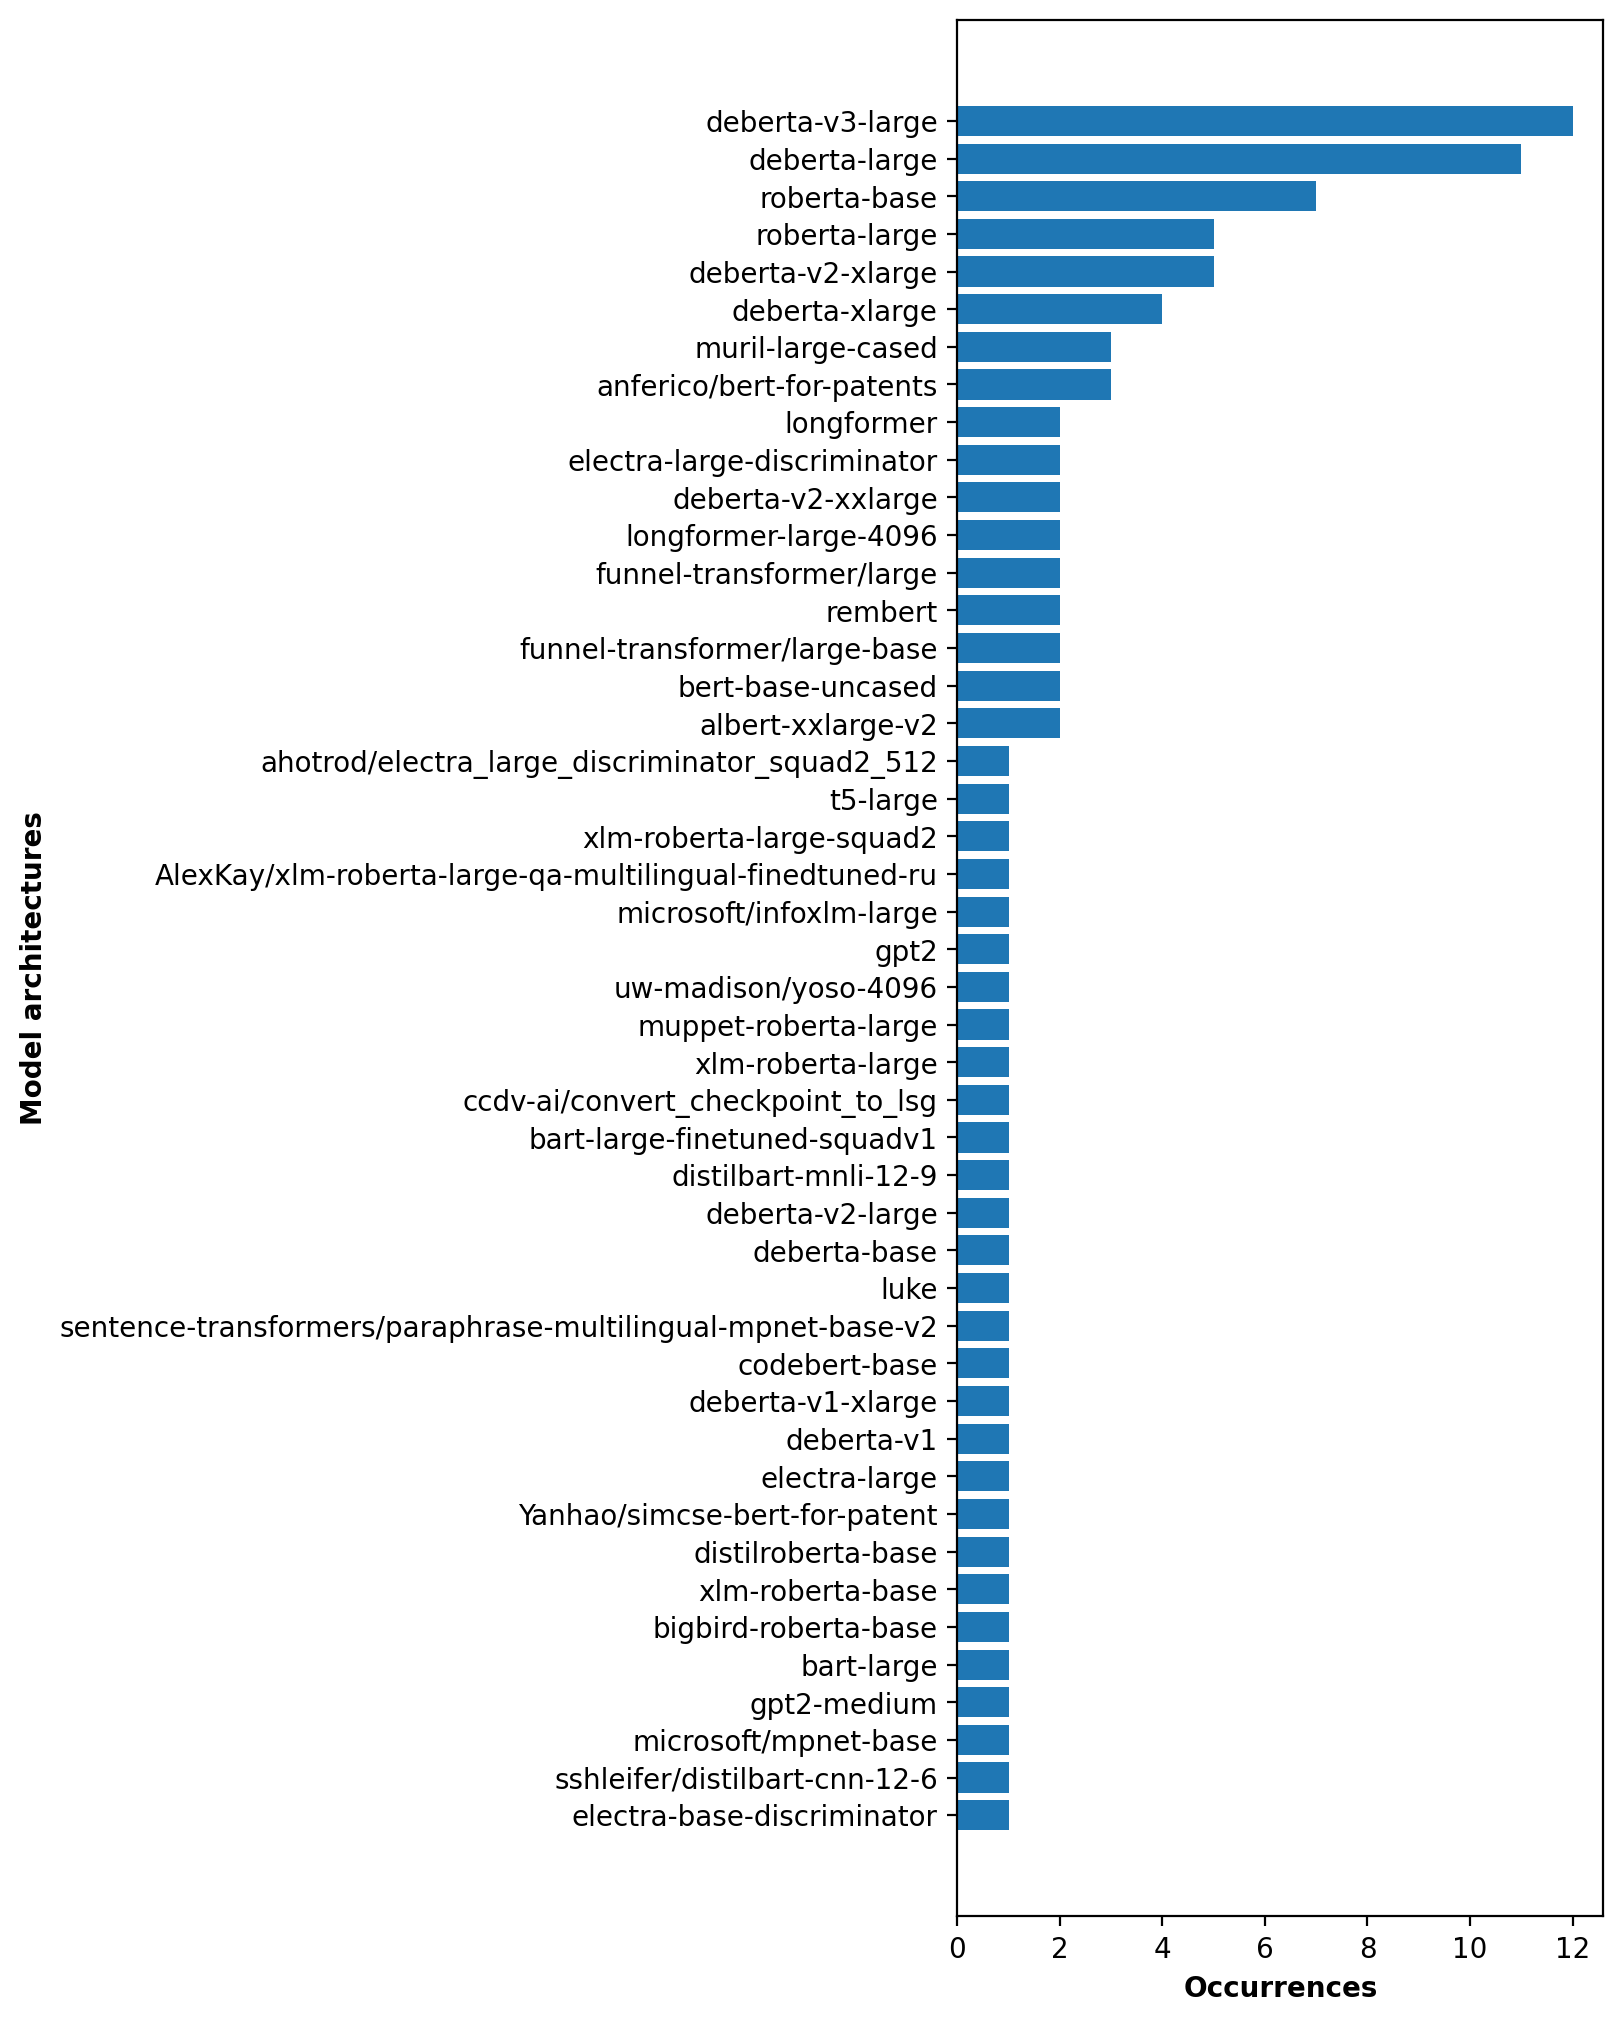

In [76]:
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8, 10),layout="constrained")

# Plot 1 - Set labels and title
ax.barh(sorted_df["Model architecture"], sorted_df['Occurrence'])
ax.set_xlabel('Occurrences',fontweight='bold');
ax.set_ylabel('Model architectures', fontweight='bold');
#ax.set_title('Model architectures used in Kaggle text data competitions');


<center><b>Figure 3.</b> Main model architectures used in Kaggle text data competitions from 2021 to 2023</center>

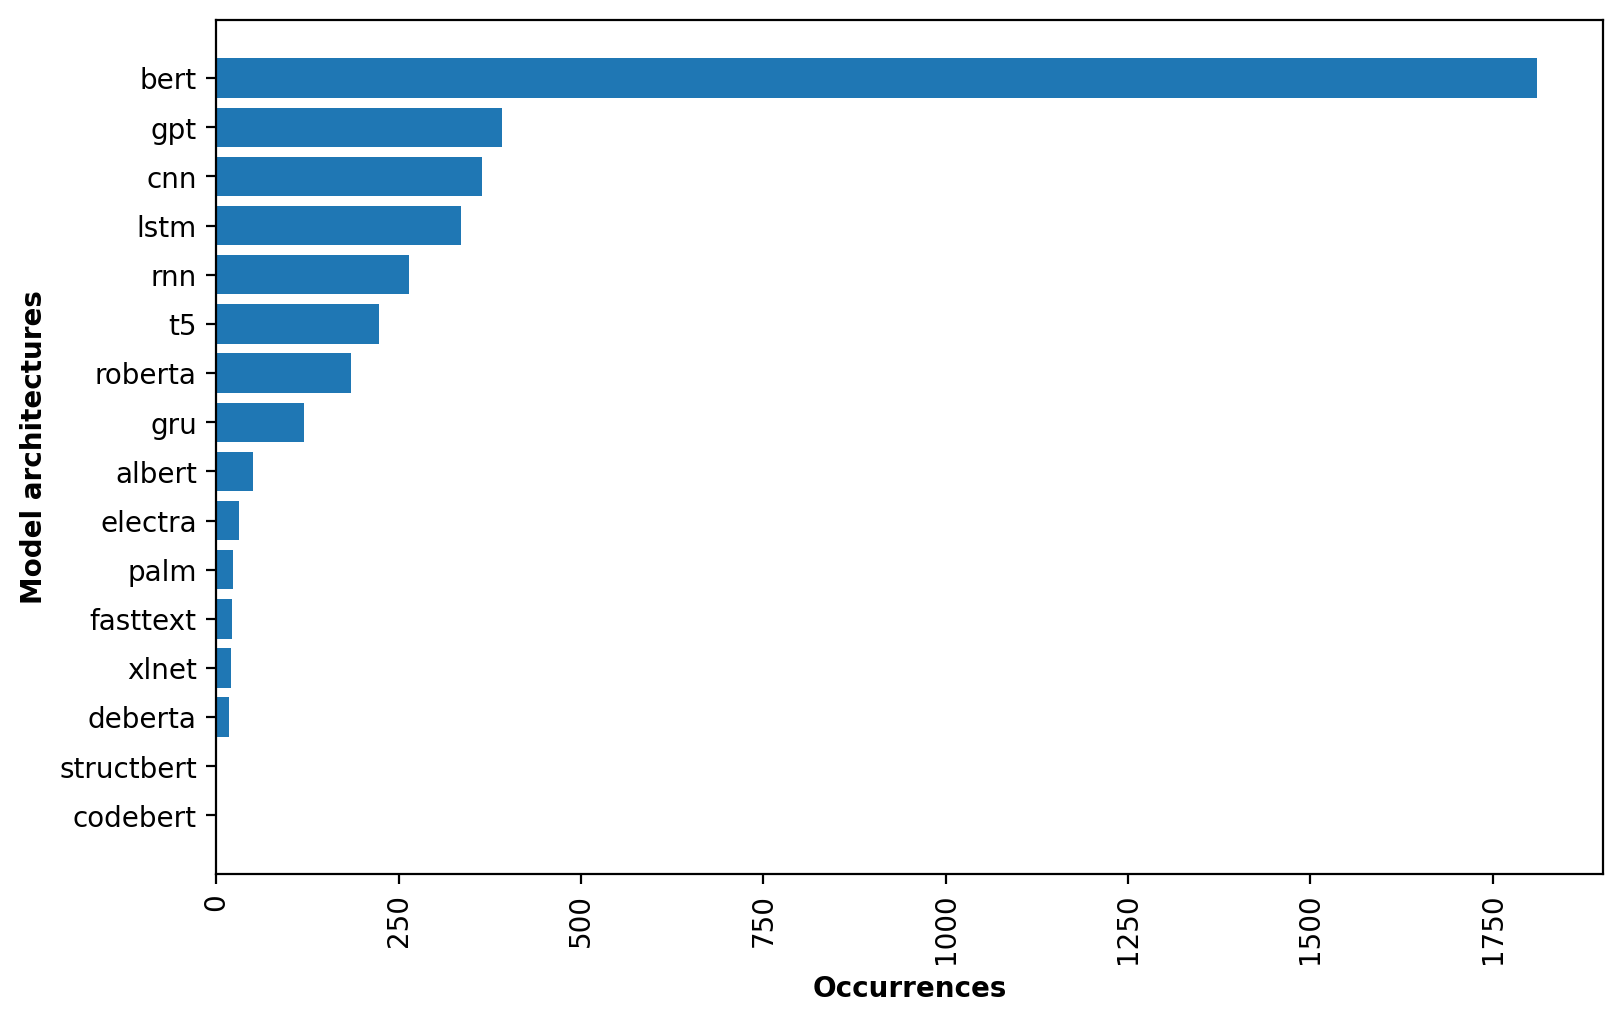

In [77]:
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8, 5),layout="constrained")

# Plot 2 - Set labels and title
ax.barh(sorted_result["String"], sorted_result['Actual Occurrences'])
ax.set_xlabel('Occurrences',fontweight='bold');
ax.set_ylabel('Model architectures', fontweight='bold');
#ax.set_title('Model architectures mentioned in Arxiv papers')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90);

<center><b>Figure 4.</b> Main model architectures mentioned in arXiv papers from 2021 to 2023</center>


Regarding traditional methods based on recurrent neural networks (RNN) such as **LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit)**, the ML community has continued to use them due to their recognized efficiency in retaining important information for longer periods and their ability to discard irrelevant information. Remarkably, their utilization has not been isolated but as an integral part of transformer-based model architectures through intermediate learning layers or heads. For instance, some architectures have included a single bidirectional RNN layer with LSTM or GRU between the backbone and three heads of a model [4]. Alternatively, LSTM has been simply added on top of BERT [5], [6] and with linear attention before the pooling stage of the Fully Connected (FC) layer [7]. Other architectures have benefited from integrating a two-layer GRU model before the predictions of each token [8], or incorporating a single attention head with its own learning rate instead of a GRU multi-attention head [9]. Overall, it has been demonstrated that adding LSTM or GRU after the pooling stage can stabilize training [10], or improve model performance by 1.5% when LSTM is used for code encoding [11]. As **Figure 4** indicates, whereas traditional approaches like CNN and LSTM still hold their relevance and are actively used for research, on Kaggle, these approaches are often combined with transformer-based architectures.


## Model Ensembling
Model ensembling has been one of the most diversified and in doubt topics within the ML community according to the [Table II of Appendix B](#Appendix-B). This is because its implementation depends not only on the Kaggler’s level of expertise and creativity but also on the time available before the competition deadline. In this regard, some solutions have relied on their **best model without generating any ensembles** [[3], [5], [12]–[14]], while others have implemented ensembles of up to 38 models [15]. **Weighted average** has been the default ensemble technique as shown in solutions [7]–[9], [16], [17]. Other approaches have used weighted average in combination with other strategies such as ridge regression [15], character-level predictions [17], probability distributions [11], and token type probabilities [4]. In second place, the strategy of **out-of-fold predictions** is found [6], [19], [20]. The third strategy is blending weights [21] either using Optuna to determine weights [22] or by applying word-level majority voting across backbones for the final submission [23]. Finally, the fourth option is a **stacked generalization ensemble** using linear regression [24] or a **gradually stacking approach** that involves assembling models by assigning the maximum logit of tokens for each character, applying the softmax function at the character level, and finally averaging all models [25].   

On the other hand, other solutions have explored alternative ways of determining the weights of their models, pushing the boundaries of creativity. An example of this is a solution [26], which promotes diversity through a 19-model ensemble and generates model weights using the **Nelder-Mead simplex algorithm**. Interestingly, they removed the weight restriction of 1 and considered negative weights. Alternatively, other approaches utilized genetic algorithms [16] or the `gp_minimize` package to generate optimal weights [10]. An innovative solution [27] proposed a **Weighted Box Fusion (WBF) method** to create a 10-model ensemble. For models with the same architecture but different folds, their strategy involved averaging token probabilities, whereas for models with different architectures, they employed the WBF method.

## Computational Efficiency
Finally, it is important to discuss the computational efficiency of models used in Kaggle competitions over the past two years. In the pursuit of highly accurate models, considerations such as prediction time and computational capabilities often get overlooked. For instance, in the Google AI4Code - Understand Code in Python Notebooks competition, one solution managed to improve its LB score through 40 days of MLM training on a deberta-v3-large model [11]. Recognizing the need for practical solutions, Kaggle introduced a second stage of the Feedback Prize - Predicting Effective Arguments competition to assess the computational efficiency of models by tracking a combination of accuracy and prediction speed metrics. Kagglers enthusiastically embraced this challenge. In this regard, one solution showcased how a single deberta-v3-large model achieved a private LB score of 0.557 in just **5 minutes and 40 seconds by utilizing out-of-fold pseudo-labels** [28]. Similarly, a solution presented in the Coleridge Initiative - Show US the data competition demonstrated that **data preprocessing reduced inference time to 10 minutes** compared to a lengthy end-to-end transformer-based analysis lasting an hour [12]. These initiatives illustrate that the ML community is becoming more mindful of developing models that can minimize carbon footprint and be practical for real-world applications where computational resources may be limited.

---

# Adversarial Weight Perturbation (AWP) 

In 2017, Miyato et al. [29] introduced adversarial and virtual adversarial training to the text domain. Instead of perturbing the original input itself, they applied perturbations to the word embeddings in a Recurrent Neural Network (RNN). **This approach resulted in reduced overfitting and improved the quality of predicted samples**. Building upon this work, in 2020, Wu et al. [30] developed an adversarial training framework called Adversarial Weight Perturbation (AWP). AWP introduced a double-perturbation mechanism to both the original input and weights. As a result, their framework contributed to improve model generalization and robust adversarial training. The promising advantages of AWP led Kagglers to eagerly test it in competitions.

Early use of AWP is reported during the Tweet Sentiment Extraction competition [31] and over the past two years, **at least five of the top three text-oriented competitions have used it**, demonstrating its effectiveness in improving the generalization of text classification tasks [6], [32] and information extraction tasks [7], [22], [24]. Specifically, AWP has made a significant impact on cross-validation (CV), with observed improvements ranging from 0.001 [24], 0.002 [22], and up to an order of magnitude of 0.01 [6], [32]. Furthermore, it has been reported in solution [6] that AWP can assist in stabilizing and extending model training, in addition to optimizing other parameters such as batch size, learning rate, weight decay, and employing a cosine learning rate schedule, among others. Similarly, another solution suggests that conducting a 5-epoch training with AWP starting at the second epoch yielded the best results [7].

---

# Pseudo Labeling (PL)
Introduced in 2013 as a simple and efficient semi-supervised learning method for deep neural networks [33], Pseudo Labeling (PL) has been a widely spread method among the ML community. During the Santander Customer Transaction competition, PL enabled solution [34] to win the competition boosting the private LB score by 0.0002. Similar results were showed for the Google QUEST Q&A Labeling competition [35]. In words of a Kaggler [36]: “Pseudo labeling is the process of adding confident predicted test data to your training data.” Briefly, **PL consists of a five-step process**: 
1. Train a model using labeled data
2. Predict labels (pseudo-labels) with the trained model using unlabeled data
3. Retrain the model using both labeled and pseudo-labeled datasets
4. Iterate between steps 2 and 3 as necessarily
5. Use the final trained model to predict test data. 

The key aspect of PL lies not in the utilization of unknown data, but rather in feeding the model with its own previously generated predictions to increase accuracy.

Over the past two years, **around 26% of the top three Kaggle solutions related to text data implemented PL**. Particularly, all the top 3 solutions of the NBME competition used PL to either predict annotations of unlabeled data [4], create a dataset including 90% of pseudo-labeled data with 10% of training data [22], or predict text spans following a teacher-student approach [18]. The latter solution is rather innovative because they designed a multi-label token classification model to predict text spans using Knowledge Distillation (KD) and Meta Pseudo Labeling (MPL) [37], [38]. Unlike pseudo labeling, teachers in meta pseudo labelling consider the student’s performance on labeled data to improve on their generation of pseudo-labels to better teach their students. Inspired by [39], [40], another solution [15] showed good improvement in CV and LB by finetuning a roberta-base model on original training data to label scraped data [41] and then training different models on pseudo-labeled data. 

On the other hand, **several solutions have proven effective performing multiple rounds of PL**. For example, solution [8] carried out a 2-round PL on external data to train a deberta-large model with a low learning rate, three epochs, and a learning scheduler with a three-group decaying learning rate (1, 0.5, 0.25) for each epoch. Meanwhile, solution [21] performed a 3-round PL to train a new single model without any original labels. This strategy allowed to distill the knowledge from a large ensemble into a single model. Finally, solution [10] applied a 5-round PL training that yielded to their best model by using 4k essays plus 11k essays from a previous competition [42].

---

# Masked Language Models (MLM)
Masked Language Model (MLM) has been another technique widely exploited by Kagglers. Because BERT-based models such as deberta-v3-large, deberta-large, roberta-base, roberta-large, and deberta-v2-xlarge are pretrained using MLM, **this technique can be extended to pretrain new data to boost performance in other specialized areas that require in-domain learning**, as show in solution [43]. For example, a solution [23] for the chaii — Hindi and Tamil Question Answering competition applied an MLM image-like technique known as cutout to mask 0 to 10% of tokens. Likewise, for the Feedback Prize — Evaluating Student Writing competition, another solution [44] applied MLM with a masking probability of 15% during training along with a Cutmix approach to cut a portion of a sequence and put it into another sequence of the same batch. In [22], utilizing MLM only on patients' notes boosted CV by 0.002 for the NBME — Score Clinical Patient Notes competition. Interestingly, a solution for the Google AI4Code – Understand Code in Python Notebooks competition noticed that a 40-day MLM pretraining on deberta-v3-large improved the LB score concluding that the longer the MLM pretraining, the better the scores [11].  

On the other hand, Wettig et al. [45] **challenged whether a token masking probability of 15% is universally optimal**, and thus they conducted a study on using alternatively masking rates to gain a better understanding of MLM pretraining. Inspired by this study, solution [6] used a MLM masking probability of 40-50% to boost CV and LB, and solution [18] implemented a task adaptation with MLM pretraining on patient notes using a token masking probability of 20%.

---

# Conclusions

This essay delves into the learnings of the ML community over the last two years in working with text data. We thoroughly examined 27 write-ups from the top three Kaggle competitions centered around text data and conducted a general meta-analysis of the arXiv dataset. Specifically, we discussed four strategies that have been commonly adopted by Kaggle text data winning solutions of the past two years. We understand that this discussion could have been taken a step further by including more write-ups, datasets, recent algorithms and techniques in NLP, and even considering tricks uniquely adopted by Kagglers to provide a broader perspective on the topic. However, we believe that the information distilled in [Table I of Appendix A](#Appendix-A) can be helpful for the ML community to examine specific topics of their interest in more detail. 

We present the following key insights and shed light on future directions based on our analysis:

* Although decoder-only models such as the GPT family have experienced rapid growth, both the ML and research community still leans towards utilizing BERT-based models.

* Traditional approaches such as LSTM and GRU remain relevant and are frequently integrated into transformer-based models conforming hybrid architectures. 

* The ML community has embraced and matured four strategies across various competitions: model ensembling, pseudo labeling, AWP, and MLM. However, specific questions still remain unanswered as [Table II of Appendix B](#Appendix-B) shows. These include properly assembling of models, investigating the impact of multiple rounds of pseudo labeling on CV and LB scores, understanding how AWP can stabilize and prolong model training, and providing further evidence regarding the use of a masking rate higher than 15% during MLM pre-training.

* Current text data solutions are too dependent on labeled data. This opens up opportunities for alternative learning approaches such as zero-shot and few-shot learning, specifically designed to classify text having no or few labeled data. An example of such a solution is [46], which leverages prompt learning—a strategy that utilizes the model's existing knowledge for reasoning and excels in few-shot learning scenarios.

* In text data solutions, there is a concern that improvements are primarily measured based on CV and LB scores. While these metrics are crucial, other factors like resource usage, prediction time, configuration settings, and language variety also hold significance. It is essential to establish comprehensive evaluation criteria and standards to ensure more reliable method comparisons. Including a small benchmark for assessing hyperparameter tuning, learning rate, dropout, weight decay, and early stopping would be desirable.

* As the constant development of more sophisticated LLMs continues, the amount of data and parameters increases, resulting in a greater need for computational resources. To address this, Feedback Prize - Predicting Effective Arguments competition launched a second evaluation stage to assess model performance and execution. This helped Kagglers gain awareness of real-world implementation considerations, including computational resource consumption and environmental impact. For instance, some text data solutions compressed their models using Knowledge Distillation and fine-tuning techniques to create lightweight models to meet computation restrictions. However, it is crucial, as recommended by [47], to focus on the development of more efficient model training techniques. This can involve strategies such as higher data efficiency through sampling training samples, arithmetic acceleration, and hardware and algorithm co-design. 

* The solutions proposed for the chaii — Hindi and Tamil Question Answering competition also demonstrated the necessity of developing resources for languages other than English.

To enhance the transfer of knowledge and promote learning within the ML community, we propose a valuable solution: improving the quality of write-ups for winning solutions. In support of this proposal, we introduce [Table I of Appendix A](#Appendix-A) as a comprehensive guide for crafting winning solution write-ups. By following this guide, participants can effectively convey their methodologies, results, and insights, enabling others to better understand and learn from their successful approaches.

---

# Appendix A

**Table 1** Summary of the top 3 Kaggle text data competitions from 2021 to 2023


In [ ]:
import pandas as pd
df_writeups = pd.read_csv('/kaggle/input/top-3-kaggle-text-data-competitions-2021-2023/Summary_27write-ups_AIreport - Text Data Write-ups 27.csv')
display(df_writeups)

---

# Appendix B
**Table 2** Summary of Frequently Asked Questions (FAQ) from write-ups of the top 3 Kaggle text data competitions from 2021 to 2023


In [ ]:
df_faq = pd.read_csv('/kaggle/input/faq-kaggle-text-data-competitions-2021-2023/Summary_27write-ups_AIreport - FAQ.csv')
display(df_faq)

---

# References
* [1]	“Top 10 Leading Language Models for NLP in 2023.” https://www.analyticsinsight.net/top-10-leading-language-models-for-nlp-in-2023/
* [2]	“Compilation of all the Text (NLP) Competitions Hosted on Kaggle.” https://medium.com/@ebrahimhaqbhatti516/compilation-of-all-the-text-nlp-competitions-hosted-on-kaggle-17301835f225
* [3]	“Top 1 solution - Coleridge Initiative — Show US the Data.” https://www.kaggle.com/competitions/coleridgeinitiative-show-us-the-data/discussion/248251
* [4]	“Top 2 solution - NBME — Score Clinical Patient Notes.” https://www.kaggle.com/competitions/nbme-score-clinical-patient-notes/discussion/323085
* [5]	“Top 1 solution - Google AI4Code – Understand Code in Python Notebooks.” https://www.kaggle.com/competitions/AI4Code/discussion/360501
* [6]	“Top 3 solution - Feedback Prize — Predicting Effective Arguments.” https://www.kaggle.com/competitions/feedback-prize-effectiveness/discussion/347433
* [7]	“Top 1 solution - U.S. Patent Phrase to Phrase Matching.” https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/discussion/332243
* [8]	“Top 3 solution - CommonLit Readability Prize.” https://www.kaggle.com/competitions/commonlitreadabilityprize/discussion/258095
* [9]	“Top 2 solution - Jigsaw Rate Severity of Toxic Comments.” https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating/discussion/308938
* [10]	“Top 2 solution - Feedback Prize — Predicting Effective Arguments.” https://www.kaggle.com/competitions/feedback-prize-effectiveness/discussion/347359
* [11]	“Top 3 solution - Google AI4Code – Understand Code in Python Notebooks.” https://www.kaggle.com/competitions/AI4Code/discussion/367600
* [12]	“Top 2 solution - Coleridge Initiative — Show US the Data.” https://www.kaggle.com/competitions/coleridgeinitiative-show-us-the-data/discussion/248296
* [13]	“Top 4 solution - Coleridge Initiative — Show US the Data.” https://www.kaggle.com/competitions/coleridgeinitiative-show-us-the-data/discussion/251457
* [14]	“Top 3 solution - chaii — Hindi and Tamil Question Answering.” https://www.kaggle.com/competitions/chaii-hindi-and-tamil-question-answering/discussion/287929
* [15]	“Top 1 solution - CommonLit Readability Prize.” https://www.kaggle.com/competitions/commonlitreadabilityprize/discussion/257844
* [16]	“Top 3 solution - Jigsaw Rate Severity of Toxic Comments.” https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating/discussion/306235
* [17]	“Top 1 solution - Jigsaw Rate Severity of Toxic Comments.” https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating/discussion/306274
* [18]	“Top 3 solution - NBME — Score Clinical Patient Notes.” https://www.kaggle.com/competitions/nbme-score-clinical-patient-notes/discussion/322832
* [19]	“Top 2 solution - Google AI4Code – Understand Code in Python Notebooks.” https://www.kaggle.com/competitions/AI4Code/discussion/343659
* [20]	“Top 2 solution - U.S. Patent Phrase to Phrase Matching.” https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/discussion/332234
* [21]	“Top 1 solution - Feedback Prize — Predicting Effective Arguments.” https://www.kaggle.com/competitions/feedback-prize-effectiveness/discussion/347536
* [22]	“Top 1 solution - NBME — Score Clinical Patient Notes.” https://www.kaggle.com/competitions/nbme-score-clinical-patient-notes/discussion/323095
* [23]	“Top 1 solution - chaii — Hindi and Tamil Question Answering.” https://www.kaggle.com/competitions/chaii-hindi-and-tamil-question-answering/discussion/287923
* [24]	“Top 3 solution - U.S. Patent Phrase to Phrase Matching.” https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/discussion/332420
* [25]	“Top 2 solution - chaii — Hindi and Tamil Question Answering.” https://www.kaggle.com/competitions/chaii-hindi-and-tamil-question-answering/discussion/287917
* [26]	“Top 2 solution - CommonLit Readability Prize.” https://www.kaggle.com/competitions/commonlitreadabilityprize/discussion/258328
* [27]	“Top 2 solution - Feedback Prize — Evaluating Student Writing.” https://www.kaggle.com/competitions/feedback-prize-2021/discussion/313389
* [28]	“Top 1 - Efficiency - Feedback Prize — Predicting Effective Arguments.” https://www.kaggle.com/competitions/feedback-prize-effectiveness/discussion/347537
* [29]	T. Miyato, A. M. Dai, and I. Goodfellow, “Adversarial Training Methods for Semi-Supervised Text Classification.” arXiv, Nov. 16, 2021. doi: 10.48550/arXiv.1605.07725.
* [30]	D. Wu, S. Xia, and Y. Wang, “Adversarial Weight Perturbation Helps Robust Generalization.” arXiv, Oct. 13, 2020. doi: 10.48550/arXiv.2004.05884.
* [31]	“272 solution - Tweet Sentiment Extraction.” https://www.kaggle.com/competitions/tweet-sentiment-extraction/discussion/143764
* [32]	“Top 1 solution - Feedback Prize — Evaluating Student Writing.” https://www.kaggle.com/competitions/feedback-prize-2021/discussion/313177
* [33]	D.-H. Lee, “Pseudo-Label : The Simple and Efficient Semi-Supervised Learning Method for Deep Neural Networks.” 2013.
* [34]	“Top 1 solution - Santander Customer Transaction Prediction.” https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/89003#513626
* [35]	“Top 1 solution - Google QUEST Q&A Labeling.” https://www.kaggle.com/c/google-quest-challenge/discussion/129840
* [36]	“Pseudo Labeling-QDA.” https://www.kaggle.com/code/cdeotte/pseudo-labeling-qda-0-969
* [37]	H. Pham, Z. Dai, Q. Xie, M.-T. Luong, and Q. V. Le, “Meta Pseudo Labels.” arXiv, Mar. 01, 2021. doi: 10.48550/arXiv.2003.10580.
* [38]	“Playground for meta-pseudo-label.” https://www.kaggle.com/code/hengck23/playground-for-meta-pseudo-label
* [39]	J. Du et al., “Self-training Improves Pre-training for Natural Language Understanding.” arXiv, Oct. 05, 2020. doi: 10.48550/arXiv.2010.02194.
* [40]	N. Thakur, N. Reimers, J. Daxenberger, and I. Gurevych, “Augmented SBERT: Data Augmentation Method for Improving Bi-Encoders for Pairwise Sentence Scoring Tasks.” arXiv, Apr. 12, 2021. doi: 10.48550/arXiv.2010.08240.
* [41]	“Readability URL Scrape.” https://www.kaggle.com/code/teeyee314/readability-url-scrape/notebook
* [42]	“Feedback Prize - Evaluating Student Writing.” https://www.kaggle.com/competitions/feedback-prize-2021/overview
* [43]	S. Gururangan et al., “Don’t Stop Pretraining: Adapt Language Models to Domains and Tasks.” arXiv, May 05, 2020. doi: 10.48550/arXiv.2004.10964.
* [44]	“Top 3 solution - Feedback Prize — Evaluating Student Writing.” https://www.kaggle.com/competitions/feedback-prize-2021/discussion/313235
* [45]	A. Wettig, T. Gao, Z. Zhong, and D. Chen, “Should You Mask 15% in Masked Language Modeling?” arXiv, Feb. 10, 2023. doi: 10.48550/arXiv.2202.08005.
* [46]	“Top 5 - U.S. Patent Phrase to Phrase Matching.” https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/discussion/332418
* [47]	B. Zhuang, J. Liu, Z. Pan, H. He, Y. Weng, and C. Shen, “A Survey on Efficient Training of Transformers.” arXiv, May 03, 2023. doi: 10.48550/arXiv.2302.01107.

---

# Submission

In [ ]:
submission = pd.read_csv("/kaggle/input/2023-kaggle-ai-report/sample_submission.csv")
submission.loc[0]['value'] = 'Kaggle competitions'
submission.loc[1]['value'] = 'https://www.kaggle.com/code/sophieb/ai-report-text-data-competitions'
submission.loc[2]['value'] = 'https://www.kaggle.com/code/kashnitsky/essay-competition-cards-recent-nlp-competitions/comments#2333491'
submission.loc[3]['value'] = 'https://www.kaggle.com/code/nibeditasahu/kaggle-ai-report-2023/comments#2334882'
submission.loc[4]['value'] = 'https://www.kaggle.com/code/datamafia7/a-text-odyssey-the-past-present-and-future-of-nlp/comments#2336611'
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)